<a href="https://colab.research.google.com/github/AkshayaBrianTauro/MachineLearning/blob/master/Home%20Works/HW3/HW3_src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.optimizers import Adam


### Data Pre-processing

In [4]:
#load collectedData_annotation.csv
mice_annoated_data = r"/content/drive/MyDrive/ACADEMICS/cs584_Machine Learning/HW3/data/A20502097_CollectedData_annotation.csv"

mice_read_csv = pd.read_csv(mice_annoated_data)
mice_read_csv.head()

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,90.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,227.0048366,155.6716332,335.7741161,241.6344509,277.0036183,219.7051607,281.3894764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,90.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,253.3199849,168.8292074,411.2108745,231.1083916,393.0682938,214.7798925,391.9130991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
miceData_rm_unnamed = mice_read_csv.columns.str.match("Unnamed")
miceData_rm_unnamed = mice_read_csv.loc[:,~mice_read_csv.columns.str.match("Unnamed")]

miceData_rm_unnamed = miceData_rm_unnamed.copy()
miceData_rm_unnamed.head()

,scorer,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,annotation.7,annotation.8,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,topleft,topleft,rightdown,rightdown,nose,nose,leftear,leftear,rightear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,x,y,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,227.0048366,155.6716332,335.7741161,241.6344509,277.0036183,219.7051607,281.3894764,198.6530421,267.3547306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,253.3199849,168.8292074,411.2108745,231.1083916,393.0682938,214.7798925,391.9130991,191.6356692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
miceData_extract = miceData_rm_unnamed

#### pre-processing of inputs/features

In [7]:
inputs = miceData_extract[["annotation.4", "annotation.5", "annotation.6", "annotation.7", "annotation.8", "annotation.9", "annotation.10", "annotation.11",
                                "annotation.12","annotation.13","annotation.14","annotation.15","annotation.16","annotation.17",
                                "annotation.22", "annotation.23", "annotation.24", "annotation.25", "annotation.26", "annotation.27", "annotation.28", "annotation.29",
                                "annotation.30", "annotation.31", "annotation.32", "annotation.33", "annotation.34", "annotation.35"
                                ]]

inputs_csv = inputs.to_csv("inputs.csv", index=False)

inputs = pd.read_csv('inputs.csv', skiprows=3)

inputs = np.array(inputs)
inputs = pd.DataFrame(data = inputs)

inputs_mice1 = inputs.iloc[:,:14]
inputs_mice2 = inputs.iloc[:,14:]

inputs_mice1 = inputs_mice1.to_csv("inputs_mice1.csv", index=False)
inputs_mice2 = inputs_mice2.to_csv("inputs_mice2.csv", index=False)

inputs_mice1 = pd.read_csv('inputs_mice1.csv')
inputs_mice2 = pd.read_csv('inputs_mice2.csv')

inputs = np.vstack((inputs_mice1, inputs_mice2))

inputs = pd.DataFrame(inputs).to_csv("processed_inputs.csv", index=False)

inputs = pd.read_csv('processed_inputs.csv')

inputs = inputs.dropna(axis=0, how='all')
#replace all the NaN with zeros
inputs = inputs.replace(np.nan, 0)



inputs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,277.003618,219.705161,281.389476,198.653042,267.354731,205.670415,241.039582,193.390012,262.091701,195.144356,247.179784,211.810616,322.616542,229.354048
1,393.068294,214.779892,391.913099,191.635669,0.000000,0.000000,346.300175,200.407385,319.107856,210.056273,0.000000,0.000000,263.846044,217.950817
2,0.000000,0.000000,239.285239,107.427195,257.705843,111.813053,233.145038,179.355267,251.565642,176.723752,249.811298,190.758498,315.599169,229.354048
3,221.218941,93.419674,228.062118,86.576497,239.011202,82.470591,261.406852,111.779445,0.000000,0.000000,280.512305,121.461940,291.915536,175.846580
4,160.077922,272.616883,172.740260,227.811688,199.038961,217.097403,238.974026,265.798701,265.272727,263.850649,295.424222,267.072428,340.159974,288.124546


#### pre-processing of labels

In [8]:
labels = miceData_extract[["annotation", "annotation.1", "annotation.2", "annotation.3", "annotation.18", "annotation.19", "annotation.20", "annotation.21"]]
labels.head()

labels_csv = labels.to_csv("labels.csv", index=False)

label_values = pd.read_csv("labels.csv", skiprows=3)

labels = np.array(label_values)

labels_df = pd.DataFrame(data = labels)

labels_mice1 = labels_df.iloc[:,:4]
labels_mice2 = labels_df.iloc[:,4:]

def mouse_1_corner_to_center(label_values):
    ##Convert from (upper-left, lower-right) to (center)
    x1, y1, x2, y2 = labels[:,0], labels[:,1], labels[:,2], labels[:,3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    # plt.plot(cx, cy)
    mouse_1_center = np.stack((cx, cy), axis=1)
    return mouse_1_center

def mouse_2_corner_to_center(label_values):
    ##Convert from (upper-left, lower-right) to (center)
    x1, y1, x2, y2 = labels[:,4], labels[:,5], labels[:,6], labels[:,7]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    mouse_2_center = np.stack((cx, cy), axis=1)
    return mouse_2_center


mouse_1_center =  mouse_1_corner_to_center(labels)

mouse_2_center =  mouse_2_corner_to_center(labels)

labels =  np.vstack((mouse_1_center, mouse_2_center))

labels = pd.DataFrame(labels).to_csv("processed_labels.csv", index=False)

labels = pd.read_csv('processed_labels.csv')

labels = labels.dropna(axis=0, how='all')
#replace all the NaN with zeros
labels = labels.replace(np.nan, 0)

labels.head()


,0,1
0,281.389476,198.653042
1,332.265430,199.968799
2,276.126447,169.706379
3,259.167712,134.618674
4,253.793775,264.488804


### Train, Validation & Test Data Split
##### Note: From the training data, again did datasplit of Training - 80% , Validation - 20%

In [9]:
# Splitting dataframe by row index
from sklearn.model_selection import train_test_split

train_all_inputs, test_inputs, train_all_labels, test_labels = train_test_split(inputs, labels, test_size=.3)

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(inputs, labels, test_size=.2)

print("Shape/dim of the inputs - {} , {}, {}".format(train_all_inputs.shape, validation_inputs.shape, test_inputs.shape))
print("Shape/dim of the labels - {} , {},{}".format(train_all_labels.shape, validation_labels.shape, test_labels.shape))

Shape/dim of the inputs - (130, 14) , (38, 14), (57, 14)
Shape/dim of the labels - (130, 2) , (38, 2),(57, 2)


### Build the model

In [10]:
from keras.layers import LeakyReLU

network = models.Sequential()

# Creating network with two hidden layer and one output layer
network.add(layers.Dense(12000, kernel_initializer='normal', activation = 'sigmoid',input_shape = (14,)))
network.add(layers.Dropout(0.5))
# network.add(Normalization(axis=-1))
network.add(LeakyReLU(alpha=0.1))
network.add(layers.Dense(650, kernel_initializer='normal',activation = 'relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Flatten())
# To further prevent overfitting, add dropout
network.add(layers.Dropout(0.5))
network.add(layers.Dense(2, activation = 'linear'))
network.summary()

#Configure the learning process
adam = Adam(learning_rate=0.001,clipnorm=1.)
network.compile(optimizer = 'adam',
                loss='mse',
                metrics =  ['mse', 'acc']
                )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12000)             180000    
                                                                 
 dropout (Dropout)           (None, 12000)             0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12000)             0         
                                                                 
 dense_1 (Dense)             (None, 650)               7800650   
                                                                 
 dropout_1 (Dropout)         (None, 650)               0         
                                                                 
 flatten (Flatten)           (None, 650)               0         
                                                                 
 dropout_2 (Dropout)         (None, 650)               0

### Train The Model

In [11]:
#Early stop setup
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

#Train the model
history = network.fit(train_inputs, train_labels, epochs=100, batch_size=100, verbose=1, validation_data=(validation_inputs, validation_labels),
                      # callbacks=early_stop
                      )

Epoch 1/100
2/2 [==============================] - 2s 543ms/step - loss: 73943.3906 - mse: 73943.3906 - acc: 0.5369 - val_loss: 32295.3789 - val_mse: 32295.3789 - val_acc: 0.8421
Epoch 2/100
2/2 [==============================] - 1s 335ms/step - loss: 25582.5352 - mse: 25582.5332 - acc: 0.8054 - val_loss: 7184.5249 - val_mse: 7184.5249 - val_acc: 0.8421
Epoch 3/100
2/2 [==============================] - 1s 310ms/step - loss: 8017.2500 - mse: 8017.2500 - acc: 0.7919 - val_loss: 11608.5410 - val_mse: 11608.5410 - val_acc: 0.8421
Epoch 4/100
2/2 [==============================] - 1s 440ms/step - loss: 15466.5908 - mse: 15466.5908 - acc: 0.7919 - val_loss: 13233.5781 - val_mse: 13233.5781 - val_acc: 0.8421
Epoch 5/100
2/2 [==============================] - 1s 484ms/step - loss: 17212.1973 - mse: 17212.1973 - acc: 0.7919 - val_loss: 7257.5146 - val_mse: 7257.5146 - val_acc: 0.8421
Epoch 6/100
2/2 [==============================] - 1s 679ms/step - loss: 8526.5449 - mse: 8526.5449 - acc: 0.80

### Evaluate The Model

In [12]:
#Test
score = network.evaluate(test_inputs, test_labels, batch_size=100, verbose=0)
print(str("test "+network.metrics_names[0])+ " " + str(score[0]))
print(str("test "+network.metrics_names[1])+ " " + str(score[1]))
print(str("test "+network.metrics_names[2])+ " " + str(score[2]))

test loss 1298.9566650390625
test mse 1298.9566650390625
test acc 0.9298245906829834


### Visualize The Results

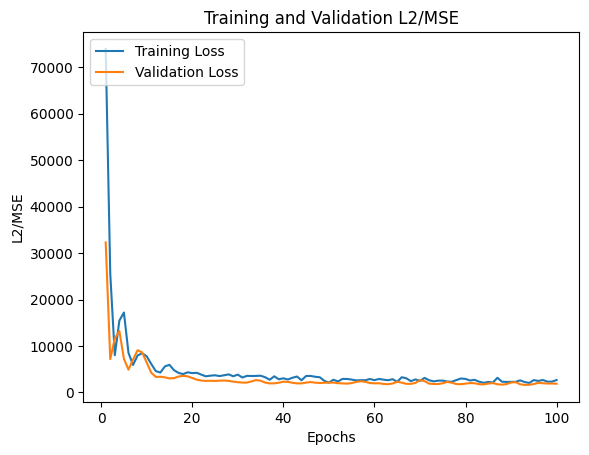

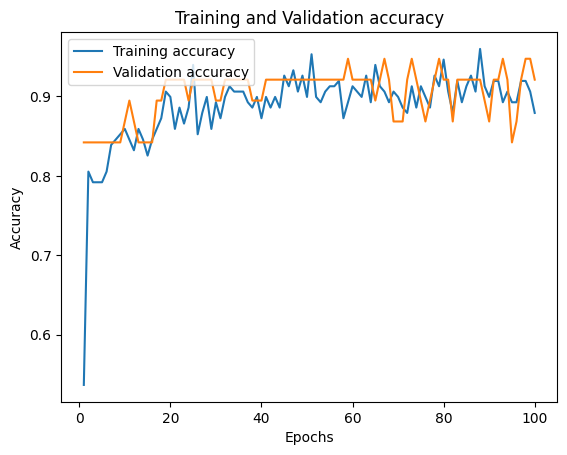

In [13]:
# Plot Training loss Vs validation as a function of epochs
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

def plotLoss(history):
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and Validation L2/MSE')
    plt.ylabel('L2/MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
    plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)
def plotAccuracy(history):
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and Validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

plotLoss(history)
plotAccuracy(history)

### Save The Weights

In [14]:
network.save_weights("/content/drive/MyDrive/ACADEMICS/cs584_Machine Learning/HW3/data/HW3.h5")